In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import rcParams 
# Parametros de las graficas.
rcParams['figure.figsize'] = (4, 4)
rcParams['figure.dpi'] = 150
rcParams['font.size'] = 10

# Aplicaciones:

### 1. [Regresion Lineal: Empresa](#empresa)
### 2. [Regresion Lineal: Casas](#casas)
### 3. [Regresion Logistica: Examen](#examen)
### 4. [Regresion Logistica: QA](#qa)
### 5. [Validación](#valid)

![title](https://chiscroller.files.wordpress.com/2015/02/previously.jpg)

## Tenemos una hipotésis, la suma de las características multiplicados por los pesos de cada características. Si obtenemos el signo de esta suma, obtenemos el resultado de la hipotésis o predicción.

#### $$ h(x) = signo(\sum_{i=0}^{m} x_i \cdot w_i)$$

## Para el perceptrón las predicciones posibles son 1 y 0.

### Para evaluar la hipotésis, comparamos la predicción  con el valor real por medio de una resta. Este resultado es el error de la hipotésis.

#### $$ error = d = y - h(x) $$

### Si la hipotésis y el valor real son iguales, la hipotésis fue correcta, no hay error!

#### $$ d = y - h(x) = (1) - (1) = 0 $$

### Si la hipotésis y el valor real son diferentes, la hipotésis se equivoco, y el error depende del valor real.

#### $$ d = y - h(x) = (0) - (1) = -1 $$

#### $$ d = y - h(x) = (1) - (0) = 1 $$

### El error representa  la * dirección * en la que la hipotésis se equivocó!

## Para corregir la hipotésis hay que actualizar los pesos. Si los actualizamos  según el error, podremos evitar el error en el futuro, ya que el peso seguira cambiando hasta que el error de 0. 

#### $$ w' =  w + (d)(x) $$

#### Por ejemplo, para $x = 1$, $y = 1$ y $w_0 = -1 $, $d_0 = 1$. Tenemos la actualización:

#### $$ w' = -1 + (1)(1) = 0 $$

## Y ahora: 

#### $$ d_1 = y -  Signo(xw) = 1 - Signo(0) = 1 - 1 = 0 $$

## De esta forma, al actualizar los pesos, se minimiza el error. 

## Sin embargo, si los valores de X son muy grandes o los pesos ideales son numeros reales, actualizar de esta forma no es viable. Para esto utilizamos el ** ritmo de aprendizaje ($\alpha$) **. Este ritmo reduce la fuerza con la que se actualiza $w$. 

#### $ w' = w + \alpha(d \cdot x) $

#### En el ejemplo anterior, para $\alpha = 0.1$: 

#### $ w' = -1 + (0.1)(1)(1) = -0.9 $


## Esto hace que dure más en llegar a minimizar el error, en este caso, pero permite más flexibilidad para llegar a una hipotésis optima. $\alpha$  debe ser un numero menor que 1.


# TALLER MACHINE LEARNING DIA 3

![title](https://statistics.laerd.com/spss-tutorials/img/lr/linear-nonlinear-relationships.png)

# Modelos de Machine Learning y su Validación



## Existen distintos tipos de modelos de Machine Learning, cada uno con su propia hipotésis, forma de medir su rendimiento y optimización. Veamos algunos de estos:

![title](https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAk3AAAAJDBiZGU1OWZiLWIzZWMtNDU0ZC04NTEwLWY5OWM2ZDc5NGYwMA.png)

## Modelos Geometricos. 

### Son aquellos cuyo objetivo es asemejar los datos a una linea o curva. 

![title](https://shapeofdata.files.wordpress.com/2013/03/cropped-blogtop5.png)

## Modelos de Arbol

### Son aquellos que modelan los datos según condiciones de los mismos.

![title](https://raw.githubusercontent.com/dmlc/web-data/master/xgboost/model/cart.png)

## Modelos de Instancia.

### Son aquellos que agrupan los datos, y usan los datos completos para hacer predicciones.

![title](http://www.python-course.eu/images/k_NN.png)

# Regresión Lineal 

### Es un modelo  que asume que la relación entre $n$ variables explicativas o  características y una variable dependiente o explicada  se puede modelar por medio de una linea.   

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/350px-Linear_regression.svg.png)

### Este modelo tiene como tarea una **regresión**, lo que significa que como resultado de la hipotésis, obtenemos un valor continuo. Ejemplo: Un precio, una duración, un indice, entre otros.

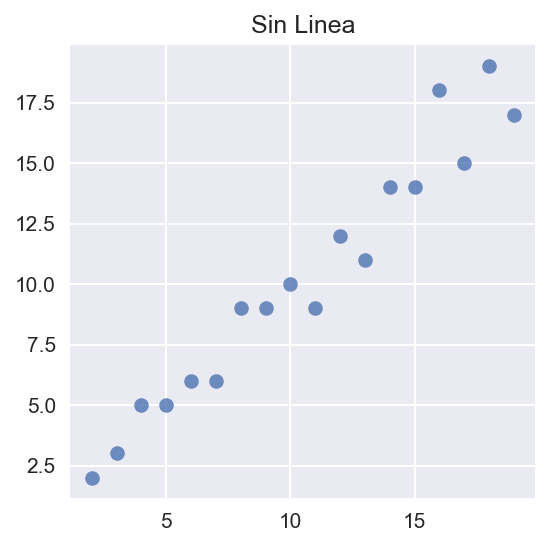

In [2]:
np.random.seed(77)
x = np.arange(2,20)
y = np.array([n + np.random.choice(3, 1)  if n % 2 == 0 else n - np.random.choice(3, 1) for n in x])
sns.regplot(x,y,fit_reg = False)
plt.title('Sin Linea')

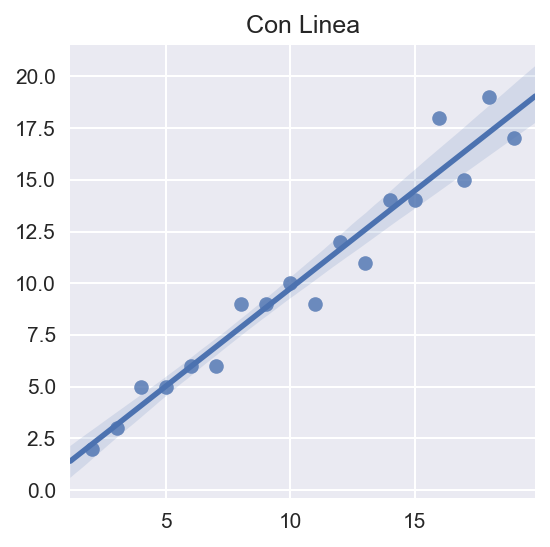

In [3]:
sns.regplot(x,y.ravel())
plt.title('Con Linea')

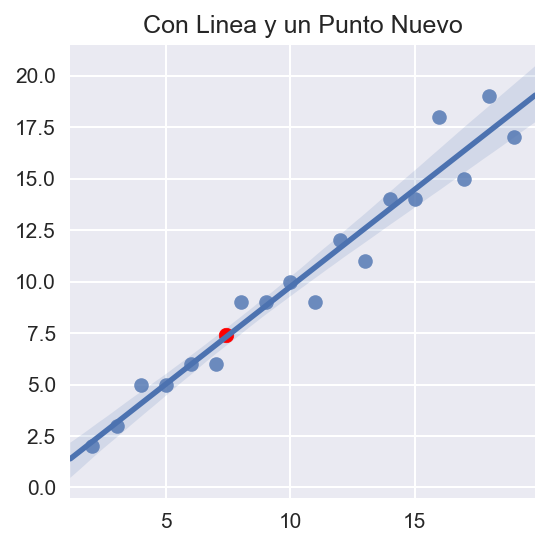

In [4]:
sns.regplot(x,y.ravel())
plt.scatter(7.4,7.4,c = 'red')
plt.title('Con Linea y un Punto Nuevo')

# Hipotésis

## La hipotésis de regresión lineal es la suma ponderada vista anteriormente. 

#### $$h(x) = \sum_{i=0}^{m} x_i \cdot w_i$$

## El resultado de esta hipotésis es un numero real, que representa el valor de la variable independente $y$. En forma vectorial: 

#### $$ h(x) = X \cdot w^T $$

# Función de costo (Error)

### La función de costo nos dice que tan lejos estuvo la hipotésis del valor real. Mientras más lejos esté la predicción, mayor el error. Para tener la mejor hipotésis, necesitamos minimizar el error. En el caso de regresión, el error es la diferencia entre el valor real y la hipotésis, tambien conocido como el **residuo**.

#### $$ r = y - h(x) $$

### Pero, esto solo nos dice que tanto se equivocó la hipotésis para un ejemplo.  ¿Cómo podemos saber que tan buena fue la hipotésis en general?

### Podemos calcular el residuo para todos los ejemplos. Para saber que tan buena fue la hipotésis para todos los datos, podemos calcular el promedio de la suma de los errores cuadrados:

#### $$ J(w) =  MSE = \frac{1}{2m}\sum_{i=0}^{m} r_i^2 $$

### En forma vectorial se puede representar como: 

#### $$ J(w) = MSE = \frac{1}{2m} r \cdot r^T $$ 

### Este calculo siempre da como resultado un numero positivo. Como podemos actualizar los pesos según la dirección del error si no la tenemos? 

# Gradiente

#### Como llegamos al punto más alto de esta montaña?
![title](http://68.media.tumblr.com/0e9b6537b7b4858c407a348d02902d59/tumblr_mqwvayVvRz1r1ksoio1_1280.jpg)


### El gradiente representa la dirección que maximiza el valor de una función de la manera más rapida. Por ejemplo, si tenemos una función cuyos valores maximos están en negro, el gradiente representa las lineas azules:
![title](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Gradient2.svg/1200px-Gradient2.svg.png)


### Como tenemos una función de error que queremos *minimizar*, si utilizamos la dirección opuesta al gradiente, llegaremos al valor *minimo* de una función.

# Descenso del Gradiente

### Como queremos minimizar el error, para actualizar los pesos w, calculamos el gradiente del error con respecto a w: 

#### $$ \nabla J(w) =\frac{1}{m} (X^T \cdot (y - h(x)))$$


### Negamos el gradiante y lo multiplicamos por un ritmo de aprendizaje para suavizarlo. 

#### $$ g = -\alpha \nabla J(w) $$ 

### Y actualizamos los pesos w con este resultado. 

#### $$ w' = w + g $$

### Si repetimos este proceso una y otra vez, llegaremos al punto más bajo de la "montaña"

# Aplicación Regresión Lineal 1: Predecir ganancias según  población del lugar.<a id="empresa"></a>

### Una empresa quiere abrir una nueva sucursal en una nueva ciudad. Para sus ultimas sucursales, tienen la cantidad de habitantes del sitio y las ganancias que han obtenido del mismo. Quieren aproximar cuales serían sus ganancias en una ciudad dada su cantidad de habitantes. Vamos a crearles un modelo de regresión lineal para satisfacer esa  necesidad.

![title](https://www.wickedreports.com/wp-content/uploads/2017/01/Profit-meeting.jpg)

In [5]:
pops = pd.read_csv('empresas.csv')
pops.head()

,Poblacion,Ganancias
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Vamos a ver una gráfica de la población con respecto a las ganancias.

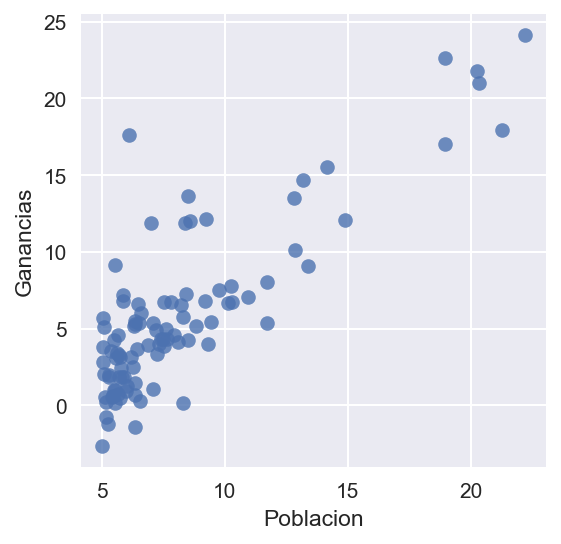

In [6]:
sns.regplot(x = 'Poblacion', y = 'Ganancias', data = pops, fit_reg = False)

Y ahora, las 3 partes del modelo. 

## Hipotésis

In [7]:
def Hipotesis(X, w):
    return np.dot(X,w.T)

## Costo 

In [8]:
def Costo(hipotesis,real):
    residuo = real - hipotesis
    cuadrado = np.dot(residuo,residuo.T)
    return cuadrado / (2 * len(real))

## Gradiente

In [9]:
def Gradiente(X,real,hipotesis):
    return X.T.dot(hipotesis - real)/len(real)


### Todo junto para formar la regresión lineal.

In [10]:
def Regresion_Lineal(X,y,iteraciones = 10,ritmo = 0.01,imprime=True):
    #Agregar intercepto a los datos
    bias = np.ones((X.shape[0],1))
    newX = np.hstack([bias,X])
    
    
    pesos = np.zeros(newX.shape[1]) #Inicializar pesos en 0
    historial_error  = [] #Para graficar los errores con el tiempo.
    for i in range(iteraciones):
        #Los cuatro pasos del modelo de aprendizaje.
        hip = Hipotesis(newX,pesos)
        error = Costo(hip,y)
        grad = Gradiente(newX,y,hip)
        pesos = pesos - (ritmo * grad)
        if imprime:
            print("Pesos en iteracion {}: {}, error: {}".format(i,pesos,error))
        historial_error.append(error)
    
    #Graficar el error por las iteraciones.
    plt.plot(list(range(iteraciones)),historial_error)
    plt.title("Error a través de las iteraciones.")
    
    print("Pesos finales: {}".format(pesos))
    return pesos


#### Probamos con los datos de la empresa.

Pesos en iteracion 0: [ 0.05839135  0.6532885 ], error: 32.07273387745567
Pesos en iteracion 1: [ 0.06289175  0.77000978], error: 6.737190464870007
Pesos en iteracion 2: [ 0.05782293  0.79134812], error: 5.931593568604956
Pesos en iteracion 3: [ 0.05106363  0.79572981], error: 5.901154707081388
Pesos en iteracion 4: [ 0.04401438  0.79709618], error: 5.895228586444221
Pesos en iteracion 5: [ 0.03692413  0.79792547], error: 5.89009494311733
Pesos en iteracion 6: [ 0.02983712  0.79865824], error: 5.885004158443646
Pesos en iteracion 7: [ 0.02276118  0.79937279], error: 5.879932480491418
Pesos en iteracion 8: [ 0.0156977   0.80008305], error: 5.874879094762573
Pesos en iteracion 9: [ 0.0086469  0.8007915], error: 5.869843911806386
Pesos finales: [ 0.0086469  0.8007915]


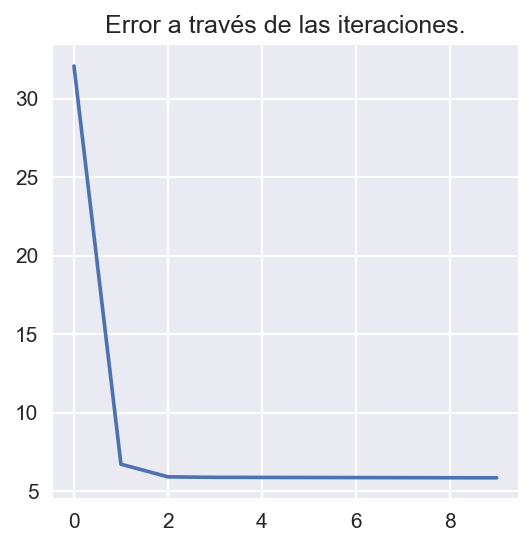

In [11]:
X = pops.drop("Ganancias",axis = 1)
y = pops['Ganancias']
best_w = Regresion_Lineal(X,y)

Ahora vamos a ver la forma de la hipotesis de esta linea.

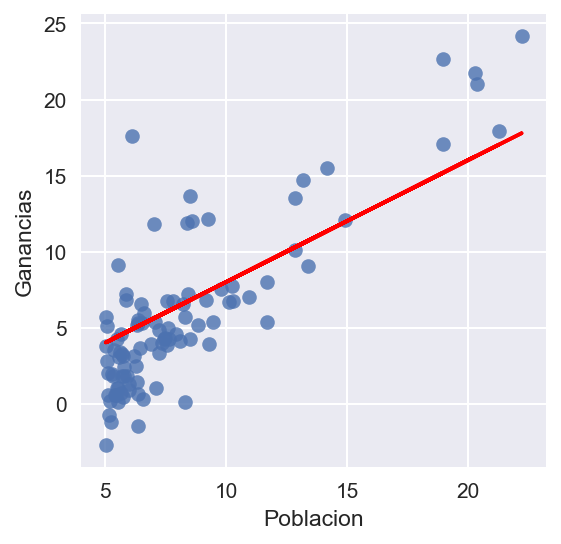

In [12]:
def predecir(x,w):
    return w[0] + np.dot(x,w[1:].T) #Ejecutar la hipotesis sin necesidad de agregar bias.

linea = predecir(pops.Poblacion.values.reshape(-1,1),best_w)
plt.plot(pops.Poblacion,linea,c = 'red')
sns.regplot(x = 'Poblacion', y = 'Ganancias', data = pops,fit_reg = False)

Tambien podemos visualizar puntos que no han sido vistos en los datos.

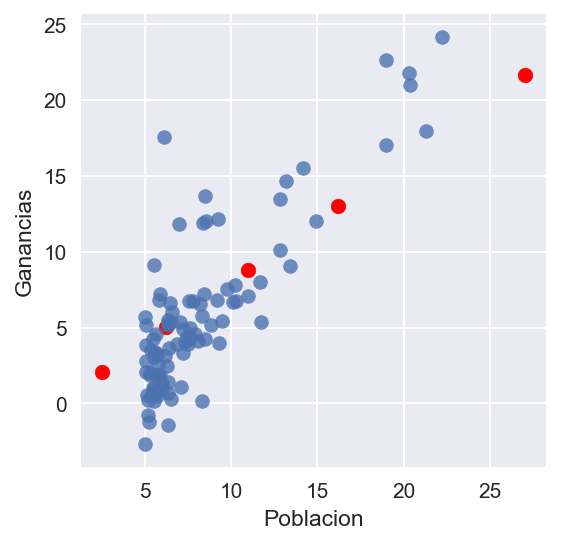

In [13]:
test = np.array([6.25,11,27,2.56,16.21]).reshape(-1,1)
plt.scatter(test,predecir(test,best_w),c = 'red')
sns.regplot(x = 'Poblacion', y = 'Ganancias', data = pops,fit_reg = False)

# Aplicación Regresión Lineal 2: Predecir costo de una casa.
<a id="casa"></a>

### Estas comprando una casa porque te quieres mudar, y un agente de bienes raices muy vivo te intenta vender una casa. Como no confias en esa persona, buscas información de precios de casas según el area que ocupa y la cantidad de habitaciones. Tu objetivo es crear un modelo de regresión lineal, para que no te dejes engañar con el precio. 

![title](http://moneyning.com/wp-content/uploads/2011/05/Fotolia_43844215_XS.jpg)

### Si intentamos aplicar regresión lineal directamente, como nos va?

In [14]:
casas = pd.read_csv("casas.csv")
casas.head()

,Area,Habitaciones,Precio
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Pesos en iteracion 0: [  3.40412660e+03   7.64209128e+06   1.12036770e+04], error: 65591548106.45744
Pesos en iteracion 1: [ -1.52887438e+08  -3.53114222e+11  -5.10013688e+08], error: 1.3492686771161516e+20
Pesos en iteracion 2: [  7.06455344e+12   1.63165217e+16   2.35664673e+13], error: 2.8808668215882586e+29
Pesos en iteracion 3: [ -3.26435277e+17  -7.53945500e+20  -1.08894729e+18], error: 6.151031136077321e+38
Pesos en iteracion 4: [  1.50837546e+22   3.48379286e+25   5.03175201e+22], error: 1.3133263833464426e+48
Pesos en iteracion 5: [ -6.96982429e+26  -1.60977321e+30  -2.32504627e+27], error: 2.8041252775933985e+57
Pesos en iteracion 6: [  3.22058081e+31   7.43835786e+34   1.07434551e+32], error: 5.9871778045016616e+66
Pesos en iteracion 7: [ -1.48814954e+36  -3.43707841e+39  -4.96428086e+36], error: 1.2783415330673785e+76
Pesos en iteracion 8: [  6.87636538e+40   1.58818764e+44   2.29386955e+41], error: 2.7294280018481467e+85
Pesos en iteracion 9: [ -3.17739580e+45  -7.33861634

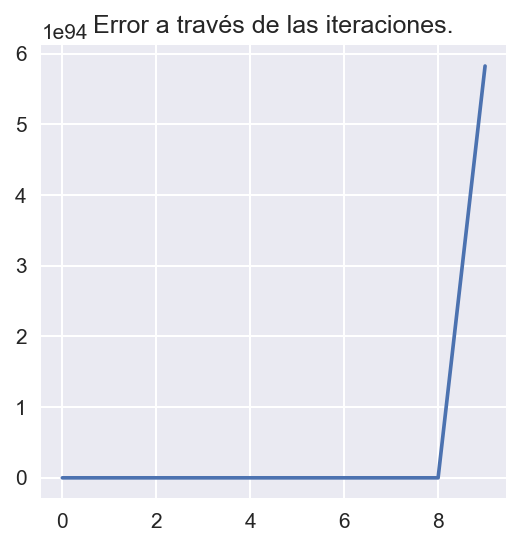

In [15]:
X_casas = casas.drop('Precio',axis = 1)
y_casas = casas['Precio']

casas_w = Regresion_Lineal(X_casas,y_casas)

### Las variables están a escalas muy diferentes. Tenemos que llevarlas todas a la misma escala aplicando normalización. Esto hace que la media de una variable sea 0 y su desviación estandar 1, y lleva los valores a una distribución normal (valores bajos). Para normalizar aplicamos el siguiente proceso:

$$ norm(x) = \dfrac{x - media(x)}{std(x)}$$

In [16]:
def normalizacion(x):
    return (x - x.mean())/x.std()

casas_norm = normalizacion(casas)
casas_norm.describe()

,Area,Habitaciones,Precio
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,1.889741e-17,2.279500e-16,-8.031401e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,3.376348e-01,1.090417e+00,3.521863e-01
max,3.117292e+00,2.404508e+00,2.874981e+00


Pesos en iteracion 0: [ -1.08660126e-18   8.36796367e-03   4.32851306e-03], error: 0.4893617021276597
Pesos en iteracion 1: [ -2.17320252e-18   1.66303056e-02   8.56880107e-03], error: 0.4805491041076719
Pesos en iteracion 2: [ -3.30704731e-18   2.47885430e-02   1.27223064e-02], error: 0.47198587701203865
Pesos en iteracion 3: [ -4.25191797e-18   3.28441704e-02   1.67904489e-02], error: 0.4636646161870628
Pesos en iteracion 4: [ -5.24403216e-18   4.07986599e-02   2.07746264e-02], error: 0.4555781400525299
Pesos en iteracion 5: [ -6.09441575e-18   4.86534616e-02   2.46762151e-02], error: 0.44771948335326117
Pesos en iteracion 6: [ -7.13377348e-18   5.64100037e-02   2.84965695e-02], error: 0.44008189061506436
Pesos en iteracion 7: [ -8.17313120e-18   6.40696932e-02   3.22370232e-02], error: 0.4326588097988902
Pesos en iteracion 8: [ -9.11800186e-18   7.16339158e-02   3.58988891e-02], error: 0.4254438861471873
Pesos en iteracion 9: [ -1.01573596e-17   7.91040367e-02   3.94834595e-02], err

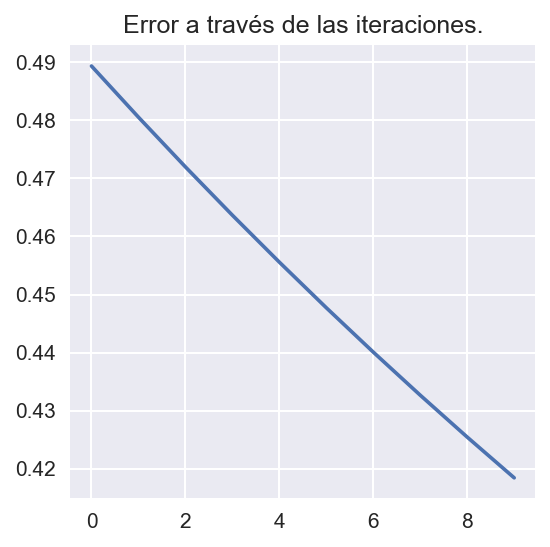

In [17]:
X_casas = casas_norm.drop('Precio',axis = 1)
y_casas = casas_norm['Precio']
casas_w = Regresion_Lineal(X_casas,y_casas)

# Regresión Logistica

### Es un modelo de clasificación que  separar clases por medio de una linea. 

![title](https://codesachin.files.wordpress.com/2015/08/linearly_separable_4.png)

### Es muy parecido al perceptron que vimos anteriormente, pero con ciertas diferencias.

# Hipotésis

### La hipotésis es casi igual a la del perceptron. Utiliza el calculo de una suma ponderada:

#### $$h(x) = \sum_{i=0}^{m} x_i \cdot w_i$$

### y una transformación a los datos muy diferente. *Por qué?*  

### En el perceptrón al obtener el resultado, solo obteníamos dos números: 0 y 1. Por ende, al calcular el error, solo obteniamos 3 valores: -1,0 y 1. Esto resultaba en problemas al actualizar los pesos, ya que no sabíamos que tanto errabamos en la hipotésis, solo en que dirección. ¿Cómo podemos saber que tan cerca estuvimos de la respuesta correcta?

## Sigmoide 

### La función sigmoide es una función que convierte casi cualquier numero a un número entre 0 y 1. Se representa de la siguiente manera: 

#### $$ s = \frac{1}{1 + e^{-x}} $$ 

### O de manera gráfica: 

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

### Para qué sirve el Sigmoide?  Si una suma ponderada cualquiera, por ejemplo: z = 2, si pasamos esa suma al sigmoide obtendremos: 

#### $$ s(2) = \frac{1}{1 + e^{-2}} = 0.8808 $$

### O -2:

#### $$ s(-2) = \frac{1}{1 + e^{2}} = 0.1192 $$

#### Lo cual modela una probabilidad! Podemos ver la hipotésis ahora como *la probabilidad de que  este ejemplo sea verdadero (1)*. La hipotésis final seria: 

#### $$ h(x) = \frac {1}{1 + e^{(X \ w^T)}} $$ 

# Costo

### Si como hipotésis tenemos la probabilidad de que el ejemplo pertenezca a la clase verdadera (1), el error sería que tan lejos está la probabilidad de la realidad.  Para encontrar la diferencia entre $y$ y la hipotésis podemos utilizar el diferencial (o derivada) del sigmoide:

$$ J(w) = h(x)(1 - h(x)) $$ 

### Cuando $ y = 1 $: 

$$ P(y = 1 \ | \ x) = h(x) $$

### Cuando $ y = 0 $:

$$ P(y = 0 \ | \ x) = 1 - h(x) $$

### Y podemos juntarlo como:

$$ P(y \ | \ x) = (h(x))^y (1 - h(x))^{1 - y}$$

### El objetivo de este costo es maximizar la probabilidad de que cada predicción pertenece a una clase, porque tecnicamente, estar 51% seguro de que una clase es positiva, da un resultado positivo, pero no es muy confiable. Para suavizar el calculo, podemos aplicar un logaritmo para eliminar los exponentes.

$$l(w) = log(P(y \ | \ x) = \\
        y log(h(x)) + (1 - y)log( 1 - h(x)) $$
        
### En forma vectorial:

$$ l(w) = \frac{1}{m} \  y log(h(x))^T + (1 - y)log(1 - h(x))^T $$

### Y ya tenemos el costo de la hipotésis, que representa la inseguridad  promedio que tiene el modelo sobre la predicción de cada ejemplo sobre su clase.

# Descenso del Gradiente.

### El gradiente de la función de costo de regresión logistica es exactamente igual que el de regresión lineal!

#### $$ \nabla J(w) =\frac{1}{m} (X^T \cdot (y - h(x)))$$

#### $$ g = -\alpha \nabla J(w) $$ 

#### $$ w' = w + g $$


### Igualmente, se repite el proceso hasta minimizar el error.

# Aplicación Regresión Logistica 1: Examén

<a id="examen"></a>

### Quieres entrar a una universidad de Estados Unidos para hacer tu maestría, pero necesitas pasar el GRE. Logras obtener resultados de algunos estudiantes en su examen de Inglés y Matématicas, y si fueron admitidos o no. Quieres saber como influyen esas dos notas en la decisión de admisión, si solo importaran esos examenes para la admisión. Elaborar un modelo de Regresión Logistica con este proposito. 

![title](https://images3.content-hci.com/commimg/myhotcourses/blog/post/myhc_19523.jpg)



### Vamos a ver los datos primero.

In [18]:
notas = pd.read_csv("examenes.csv")
notas.head()

,Ingles,Matematicas,Admitido
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


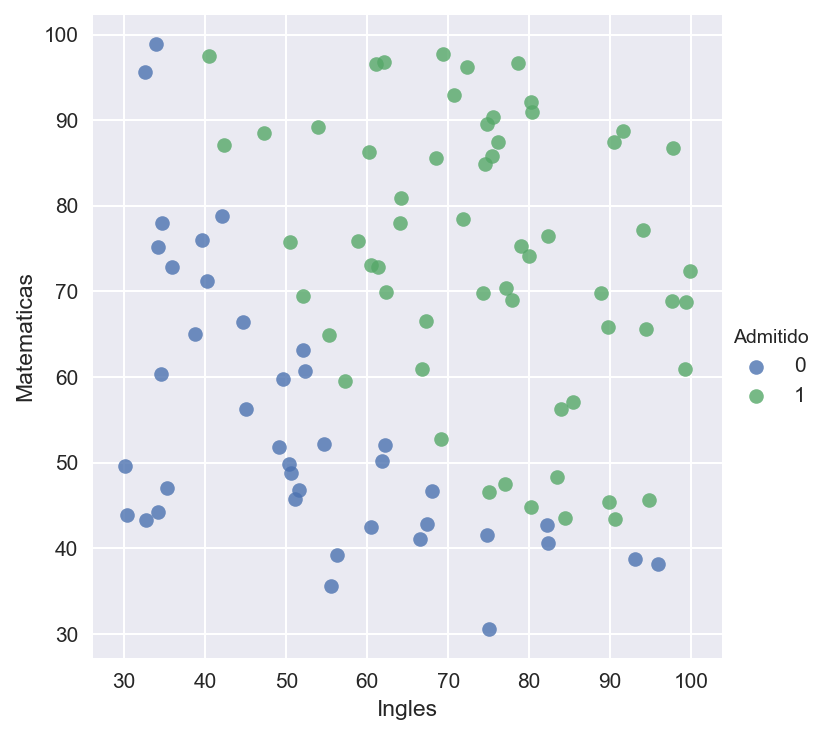

In [19]:
sns.lmplot(x = 'Ingles',y = 'Matematicas',hue = 'Admitido', data = notas,fit_reg = False)

### Sigmoide

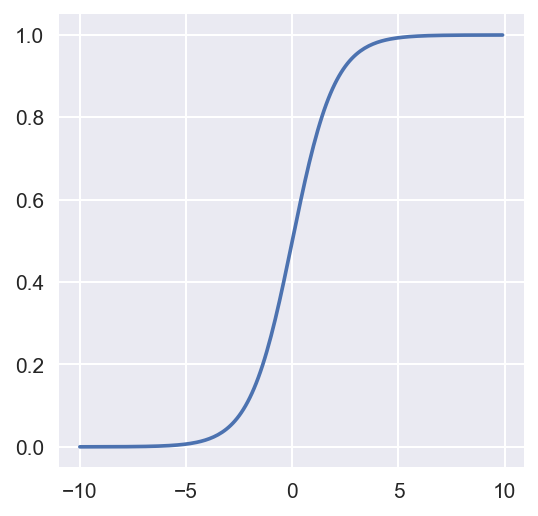

In [20]:
def Sigmoide(z):
    return 1/(1 + np.exp(-z))

x = np.arange(-10,10,0.1)
s = Sigmoide(x)
plt.plot(x,s)

## Costo

In [21]:
def Costo_Log(hipotesis,real):
    size = 1/len(real)
    #Funcion vectorizada
    p = np.dot(real,np.log(hipotesis).T)#Caso y = 1
    invp = np.dot(1 - real,np.log(1 - hipotesis).T) # Caso y = 0
    cost = size * (p + invp) 
    return -cost

### Y ahora todo junto en una sola función.

In [22]:
def Regresion_Logistica(X,y,iteraciones = 10,ritmo = 0.001,imprime = True):
    #Agregar intercepto a los datos
    bias = np.ones((X.shape[0],1))
    newX = np.hstack([bias,X])
    
    
    pesos = np.zeros(newX.shape[1]) #Inicializar pesos en 0
    historial_error  = [] #Para graficar los errores con el tiempo.
    for i in range(iteraciones):
        #Los cuatro pasos del modelo de aprendizaje.
        hip = Hipotesis(newX,pesos)
        sig = Sigmoide(hip)
        error = Costo_Log(sig,y)
        grad = Gradiente(newX,y,sig) 
        pesos = pesos - (ritmo * grad)
        if imprime:
            print("Pesos en iteracion {}: {}, posibilidad: {}".format(i,pesos,error))
        historial_error.append(error)
    
    #Graficar el error por las iteraciones.
    plt.plot(list(range(iteraciones)),historial_error)
    plt.title("Error a través de las iteraciones.")
    
    print("Pesos finales: {}".format(pesos))
    pred = Sigmoide(Hipotesis(newX,pesos)) > 0.5
    print("Certeza del modelo: {} %".format(np.sum(np.equal(y,pred )) / len(y) * 100))
    return pesos

Pesos finales: [-6.87627765  0.06105823  0.05445471]
Certeza del modelo: 93.0 %


array([-6.87627765,  0.06105823,  0.05445471])

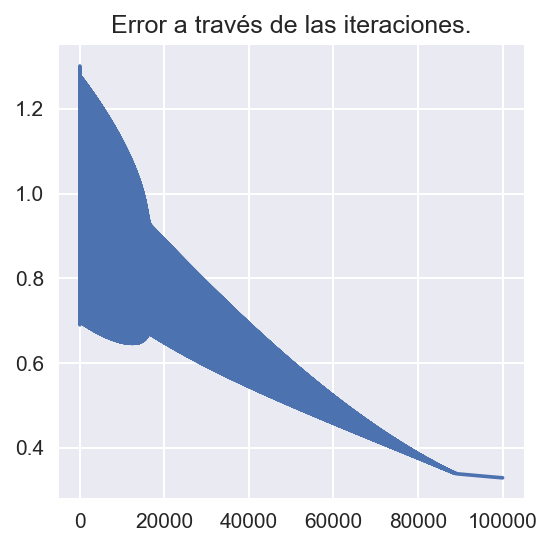

In [23]:
X = notas.drop("Admitido",axis = 1)
y = notas["Admitido"]
Regresion_Logistica(X,y,iteraciones = 100000, ritmo = 0.0015,imprime = False)

### Qué tal con normalización de 0 a 1?

In [24]:
def minmax(x):
    return (x - x.min())/(x.max() - x.min())

notas_norm = minmax(notas)
notas_norm.Admitido = notas_norm.Admitido.astype(np.int8)
notas_norm.describe()

,Ingles,Matematicas,Admitido
count,100.000000,100.000000,100.000000
mean,0.510046,0.521763,0.600000
std,0.278895,0.272211,0.492366
min,0.000000,0.000000,0.000000
25%,0.298996,0.257462,0.000000
50%,0.529951,0.543155,1.000000
75%,0.718853,0.714224,1.000000
max,1.000000,1.000000,1.000000


Pesos finales: [-2.59498265  3.33917133  2.91971101]
Certeza del modelo: 91.0 %


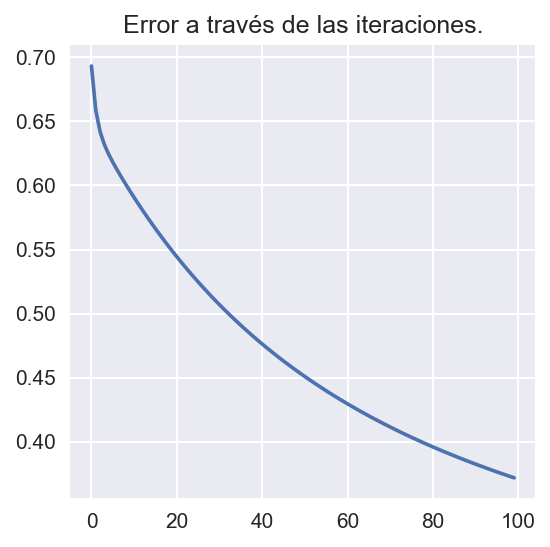

In [25]:
X = notas_norm.drop("Admitido",axis = 1)
y = notas_norm["Admitido"]
best_w = Regresion_Logistica(X,y,iteraciones = 100,ritmo = 1,imprime = False)

### Ahora veamos la linea de separación de las clases.

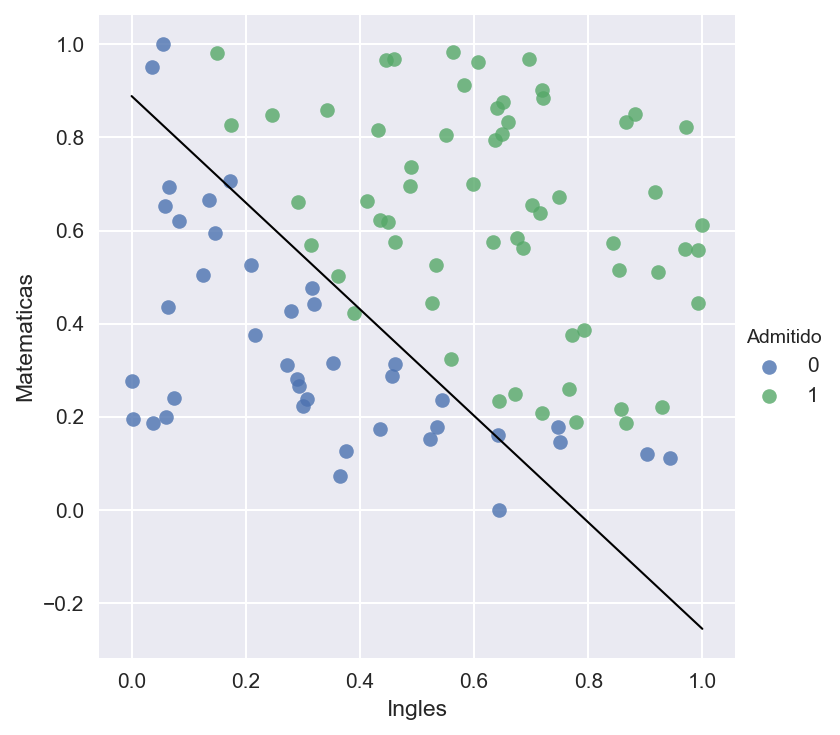

In [26]:
#Magia negra para graficar la linea de separación
w = best_w
a = -w[1] / w[2]
xx = np.linspace(notas_norm.Ingles.min(), notas_norm.Ingles.max())
yy = a * xx - (w[0]) / w[2]


sns.lmplot(x = 'Ingles',y = 'Matematicas',hue = 'Admitido', data = notas_norm,fit_reg = False)
plt.plot(xx, yy, 'k-',linewidth = 1)

# Aplicación Regresión Logistica 2: QA de Microchips.
<a id="qa"></a>

###   Eres un personal de aseguramiento de calidad que le hace dos pruebas a unos microchips. Según los resultados de esas pruebas, apruebas el microchip o no. Tienes un historial de pruebas de microchips, y su aceptación. Para facilitarte el trabajo en el futuro,   creaste un modelo de regresión logistica con esos datos. 

![title](http://www.adhikinternational.com/wp-content/uploads/2017/02/man-in-hard-hat-with-clipboard-checking-machine.jpg)

### Mismo procedimiento, visualizar los datos.

In [27]:
micro = pd.read_csv("micro.csv")
micro.head()

,Prueba 1,Prueba 2,Aceptado
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


### A la misma escala?

In [28]:
micro.describe()

,Prueba 1,Prueba 2,Aceptado
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


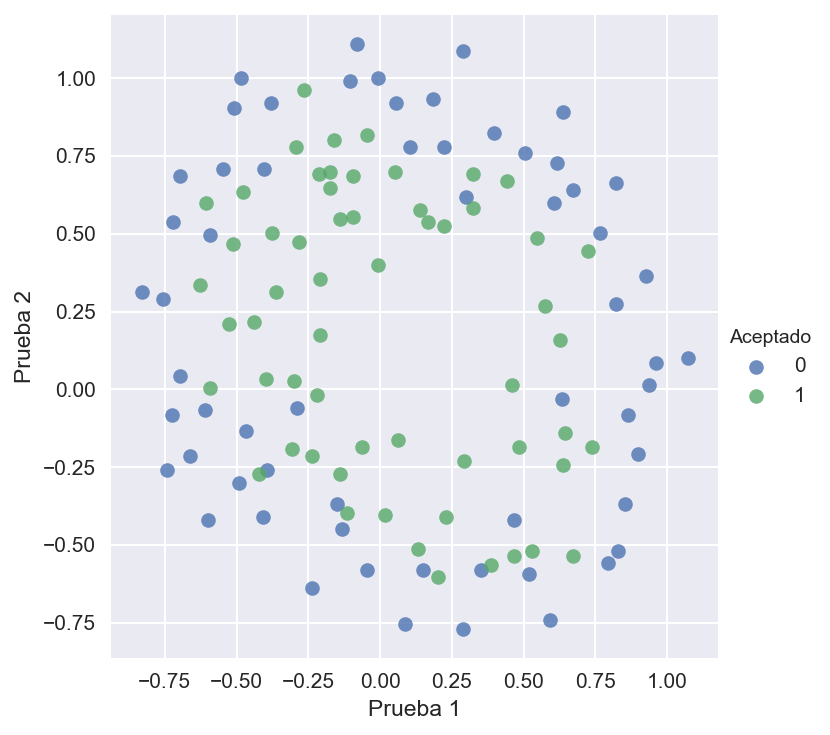

In [29]:
sns.lmplot(x = 'Prueba 1',y = 'Prueba 2',hue = 'Aceptado', data = micro,fit_reg = False)

### No importa como se intente entrar una linea recta, no se podran separar las clases. Tendremos que modificar los datos para tener una función que no sea una linea recta. Esto se puede obtener con los polinomios de la función. 

$$ map(x) = [x_1,x_2,x_1^2,x_1x_2,x_2^2,...,x_1x_2^5,x_2^6] $$

In [30]:
from sklearn.preprocessing import PolynomialFeatures
#Crear matriz con las variables polinomiales.
poly = PolynomialFeatures(6) 
polyX = poly.fit_transform(micro.drop('Aceptado',axis = 1))
polyX.shape

(118, 28)

### Ahora podemos aplicar regresión logistica y obtener una función no lineal.

Pesos finales: [  6.89454682e-01   6.89454682e-01   7.16598219e-01   1.37523633e+00
  -2.26167723e+00  -9.27752165e-01  -1.40999666e+00   1.02581908e-01
  -3.87390249e-01  -3.84161293e-01  -2.29956603e-01  -1.68871044e+00
  -9.13244782e-02  -6.64090173e-01  -2.73029407e-01  -1.35699955e+00
  -3.13458860e-01  -2.38436872e-01  -7.66672166e-02  -2.95192543e-01
  -3.05349596e-01  -6.51069475e-01  -1.23426584e+00  -1.93329725e-03
  -3.25312533e-01  -2.04347451e-03  -3.57953443e-01  -1.39758759e-01
  -1.18093415e+00]
Certeza del modelo: 83.05084745762711 %


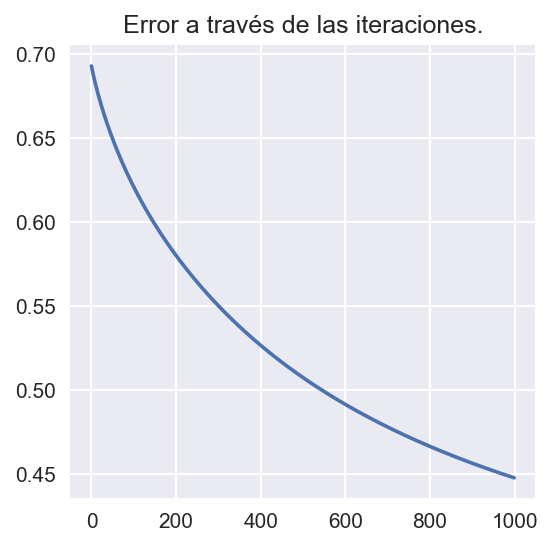

In [31]:
y = micro["Aceptado"]
best_w = Regresion_Logistica(polyX,y,iteraciones = 1000,ritmo = 0.1,imprime = False)

### Visualicemos la linea de decisión.

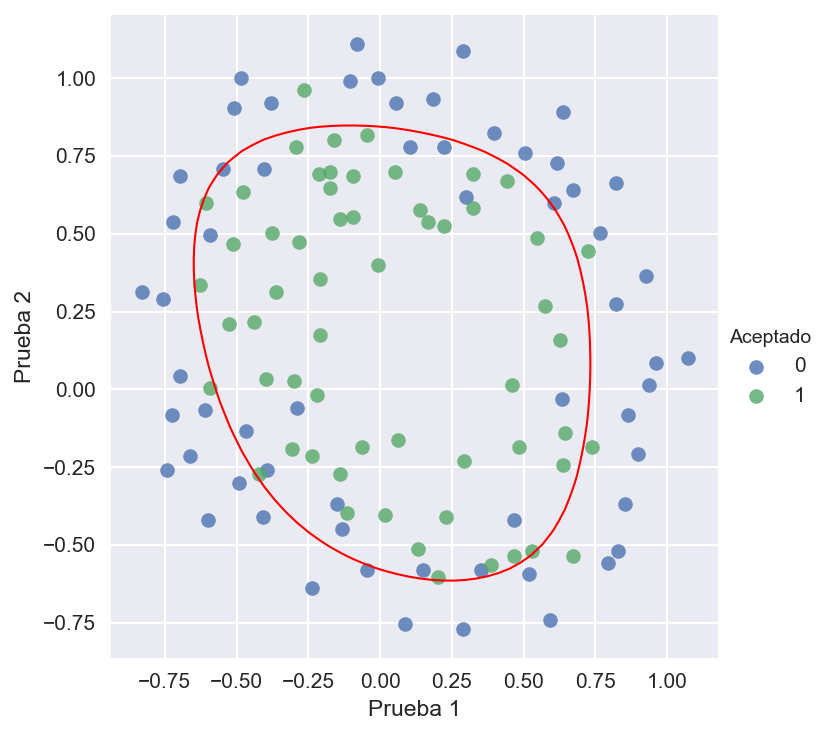

In [32]:
def Plot_Decision(X,y,w):
    #Funcion para visualizar la curva de decision. No le presten mucha atención.
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    
    h =  Sigmoide(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(w[1:]) + w[0])
    h = h.reshape(xx1.shape)  
    sns.lmplot(x = 'Prueba 1',y = 'Prueba 2',hue = 'Aceptado', data = micro,fit_reg = False)
    plt.contour(xx1, xx2, h, [0.5], linewidths=1,colors = 'r')
    plt.show()

Plot_Decision(micro.drop('Aceptado',axis = 1).values,y,best_w)

# Validación de Modelos

### Todo este tiempo, hemos estado validando los modelos con datos de entrenamiento. Esto no es una buena práctica, ya que el objetivo del modelo es que funcione para datos que no ha visto. El modelo se entrena con los datos de ejemplo, se "acostumbra" a ellos. Esto puede causar que el modelo se "aprenda" los datos y no la función debajo de los mismos. 

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Overfitted_Data.png/300px-Overfitted_Data.png)

### Veamoslo en acción.

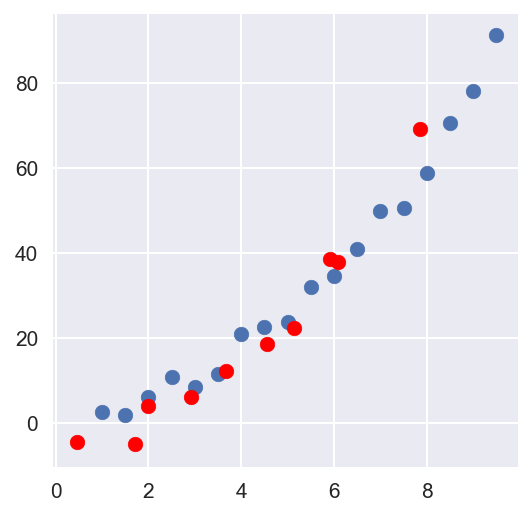

In [33]:
np.random.seed(42)
x = np.arange(1,10,0.5)
y = (x ** 2 ) +  np.random.normal(0,3,len(x))
testx = np.random.rand(10) * 10
testy = (testx ** 2) + np.random.normal(0,4,len(testx))
plt.scatter(x,y)
plt.scatter(testx,testy,c = 'r')

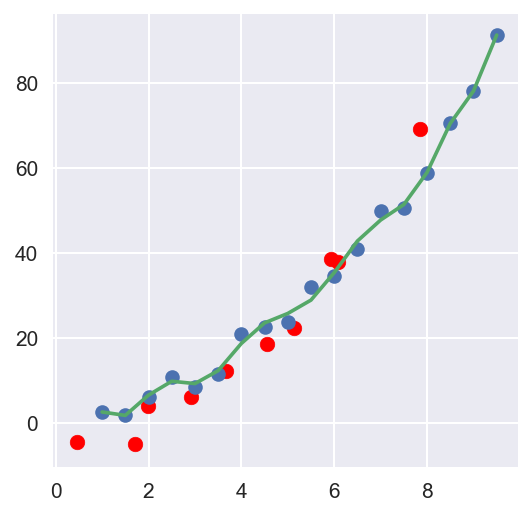

In [34]:
z = np.polyfit(x, y, 12)
f = np.poly1d(z)
x_new = np.linspace(x[0],x[-1], len(x))
y_new = f(x_new)
plt.plot(x,y,'o', x_new, y_new)
plt.scatter(testx,testy,c = 'r')

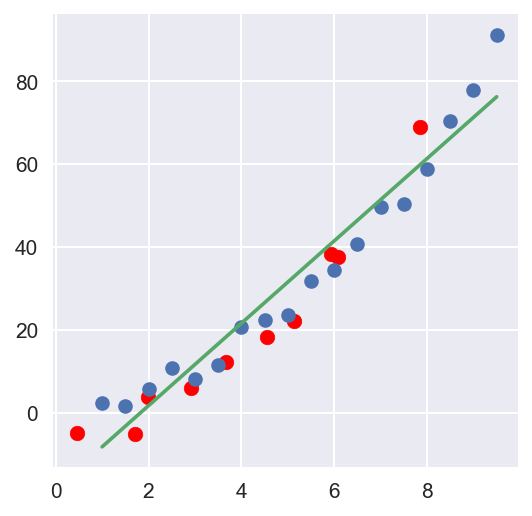

In [35]:
z = np.polyfit(x, y, 1)
f = np.poly1d(z)
x_new = np.linspace(x[0],x[-1], len(x))
y_new = f(x_new)
plt.plot(x,y,'o', x_new, y_new)
plt.scatter(testx,testy,c = 'r')

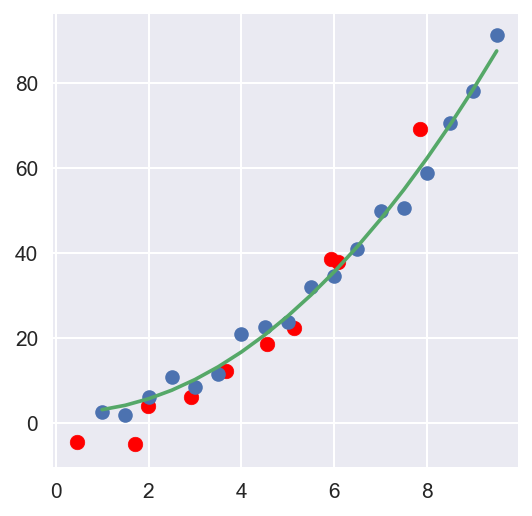

In [36]:
z = np.polyfit(x, y, 2)
f = np.poly1d(z)
x_new = np.linspace(x[0],x[-1], len(x))
y_new = f(x_new)
plt.plot(x,y,'o', x_new, y_new)
plt.scatter(testx,testy,c = 'r')

## Bias vs. Variance

### El objetivo de los modelos de machine learning es poder generalizar afuera de sus datos de entrenamiento. Esto implica minimizar dos fuentes de error que están intrinsicamente relacionados. Este dilemma es conocido como el intercambio bias-variance, y es una parte fundamental de la validación de los modelos de Machine Learning. 

### Bias: Es el error de las asunciones incorrectas del algoritmo de aprendizaje. Si el bias es alto, el algoritmo puede perderse de relaciones relevantes entre las variables (*underfitting*).

### Variance (Varianza): Es el error de al sensibilidad a pequeños cambios en los datos de entrenamiento. Si la varianza es alta, el modelo se aprenderá el *ruido*  en vez de la relación entre las variables (*overfitting*).

### El modelo más generalizado tiene bias y varianza bajos. 

## Bias vs. Variance

![title](https://i.stack.imgur.com/r7QFy.png)



### Para poder validar el modelo y captar el bias-variance del mismo, dividimos los datos en dos: entrenamiento y prueba. Usamos la mayoria de los datos para entrenar, y el resto para validar.

## Curva de Aprendizaje. 

### Al incrementar el tamaño de los datos de entrenamiento se ven comportamientos diferentes. 
### Para un bias alto:

![title](https://i.stack.imgur.com/qUWMX.png)

### Para un variance alto:

![title](https://i.stack.imgur.com/QbYaJ.png) 



## Como combatir el bias? 

- Mejorar los parametros del modelo. 
- Agregar más columnas/ variables.
- Usar un modelo más complejo.

## Como combatir la varianza? 

- Agregar más datos.
- Disminuir el numero de columnas/variables.
- Mejorar los parametros del modelo.
- Regular los pesos.

# Aplicación Validación: Venta de Casa. 
<a id="valid"></a>

### Luego de durar algunos años en tu casa, decides mudarte.  Antes de mudarte, quieres vender la casa. Esta vez, haces un mejor estudio de las casas en los alrededores, y obtienes mucho más información. Creas un modelo de regresión, y lo validas bien para poder vender tu casa al mejor precio. 

![title](https://fishsouthbay.files.wordpress.com/2012/03/selling_a_home.jpg)

### De nuevo, a visualizar los datos.

In [37]:
ventas_casa = pd.read_csv('ventas_casa.csv',encoding = 'latin1')
ventas_casa.head()

,habitaciones,baños,area_estancia,area_lote,pisos,frenteagua,vista,condicion,grade,area_techo,año,renovada,sotano,precio
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,0,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1,1,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,0,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,1,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,0,510000.0


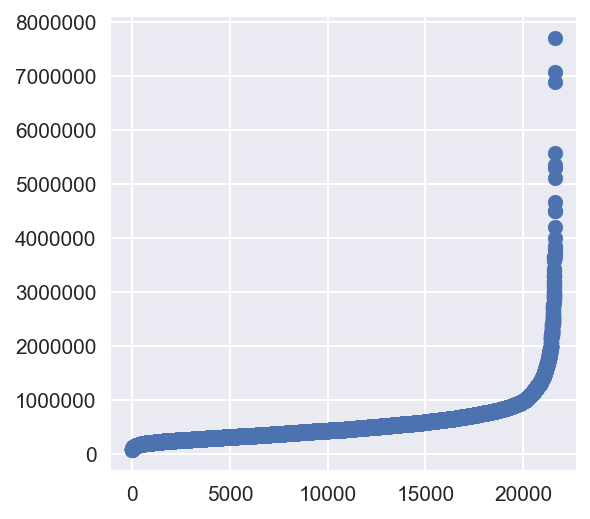

In [38]:
p_sorted = ventas_casa.precio.sort_values()
plt.scatter(range(len(p_sorted)),p_sorted)

### Los precios de las casas estan muy ajustados. Que pasa si le aplicamos una transformación como el logaritmo natural?

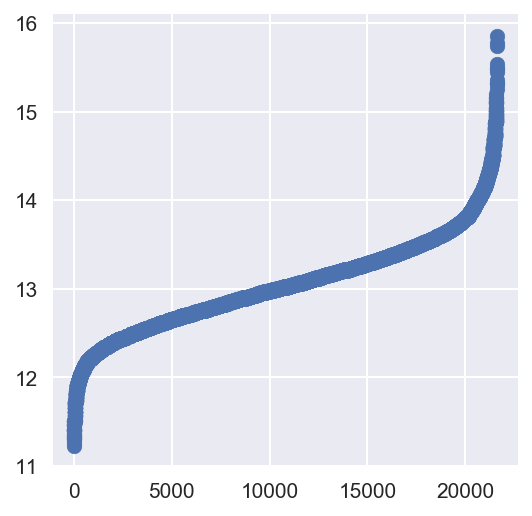

In [39]:
log_p = np.log(ventas_casa.precio.sort_values())
plt.scatter(range(len(log_p)),log_p)

### A normalizar, pero esta vez, sin la variable dependiente, el precio.

In [40]:
ventas_norm = normalizacion(ventas_casa.drop('precio',axis = 1))
ventas_norm.describe()

,habitaciones,baños,area_estancia,area_lote,pisos,frenteagua,vista,condicion,grade,area_techo,año,renovada,sotano
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04
mean,7.966196e-16,4.750304e-15,2.164660e-16,1.537582e-16,-7.674835e-16,-1.172344e-15,-2.130659e-15,-1.305018e-14,-4.470126e-15,-6.304894e-16,3.007727e-15,-6.208545e-15,2.168369e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.624320e+00,-2.745856e+00,-1.948846e+00,-3.521677e-01,-9.154058e-01,-8.717061e-02,-3.057524e-01,-3.702582e+00,-5.663213e+00,-1.809452e+00,-2.417327e+00,-2.101301e-01,-8.040830e-01
25%,-3.987279e-01,-4.736105e-01,-7.108783e-01,-2.430431e-01,-9.154058e-01,-8.717061e-02,-3.057524e-01,-6.291723e-01,-5.588228e-01,-7.226147e-01,-6.810627e-01,-2.101301e-01,-8.040830e-01
50%,-3.987279e-01,1.756026e-01,-1.849871e-01,-1.808034e-01,1.053914e-02,-8.717061e-02,-3.057524e-01,-6.291723e-01,-5.588228e-01,-2.758039e-01,1.360027e-01,-2.101301e-01,-8.040830e-01
75%,6.764694e-01,5.002092e-01,5.118460e-01,-1.066855e-01,9.364841e-01,-8.717061e-02,-3.057524e-01,9.075325e-01,2.919089e-01,5.091340e-01,8.849794e-01,-2.101301e-01,1.243595e+00
max,3.185719e+01,7.641553e+00,1.247778e+01,3.950342e+01,3.714319e+00,1.147123e+01,4.914016e+00,2.444237e+00,4.545567e+00,9.203831e+00,1.497779e+00,4.758735e+00,1.243595e+00


### Ahora procedemos a evaluar el  modelo de regresión logistica. Haremos 3 modelos, uno underfit, uno overfit y otro justo.

### Para el overfit, usaremos todas las columnas y pocos datos de entrenamiento

In [41]:
overfit = ventas_norm
overfit.head()

,habitaciones,baños,area_estancia,area_lote,pisos,frenteagua,vista,condicion,grade,area_techo,año,renovada,sotano
0,-0.398728,-1.447430,-0.979812,-0.228316,-0.915406,-0.087171,-0.305752,-0.629172,-0.558823,-0.734691,-0.544885,-0.210130,-0.804083
1,-0.398728,0.175603,0.533622,-0.189881,0.936484,-0.087171,-0.305752,-0.629172,-0.558823,0.460830,-0.681063,4.758735,1.243595
2,-1.473925,-1.447430,-1.426221,-0.123296,-0.915406,-0.087171,-0.305752,-0.629172,-1.409554,-1.229805,-1.293862,-0.210130,-0.804083
3,0.676469,1.149422,-0.130547,-0.244009,-0.915406,-0.087171,-0.305752,2.444237,-0.558823,-0.891678,-0.204441,-0.210130,1.243595
4,-0.398728,-0.149004,-0.435412,-0.169649,-0.915406,-0.087171,-0.305752,-0.629172,0.291909,-0.130892,0.544535,-0.210130,-0.804083


### Para dividir los datos, escogemos ejemplos aleatorios.

In [42]:
division = np.random.rand(len(overfit)) < 0.1 #Escoge 10% de los datos
poly = PolynomialFeatures(2) 
polyover = poly.fit_transform(overfit)

over_train =polyover[division]
over_test = polyover[~division]

over_ytrain = log_p[division]
over_ytest = log_p[~division]

### Y ahora, entrenamos  y evaluamos.

In [43]:
def Regresion_Validar(X,y,Xtest,ytest,iteraciones = 100,ritmo = 0.01,imprime=True):
    #Agregar intercepto a los datos
    bias = np.ones((X.shape[0],1))
    newX = np.hstack([bias,X])
    
    
    pesos = np.zeros(newX.shape[1]) #Inicializar pesos en 0
    historial_error  = [] #Para graficar los errores con el tiempo.
    train_errors = []
    test_errors = []
    for i in range(iteraciones):
        #Los cuatro pasos del modelo de aprendizaje.
        hip = Hipotesis(newX,pesos)
        error = Costo(hip,y)
        grad = Gradiente(newX,y,hip)
        pesos = pesos - (ritmo * grad)
        if imprime:
            print("Pesos en iteracion {}: {}, error: {}".format(i,pesos,error))
        historial_error.append(error)
        if  i % 10 == 0:
            print("Iteracion {}".format(i))
            pred_train = predecir(X,pesos)
            train_error = Costo(hipotesis=pred_train,real=y)
            print("Error del entrenamiento: {}".format(train_error))
            train_errors.append(train_error)
            
            pred_test = predecir(Xtest,pesos)
            test_error = Costo(hipotesis=pred_test,real=ytest)
            print("Error de prueba: {}".format(test_error))
            test_errors.append(test_error)
    
    #Graficar el error por las iteraciones.
    plt.plot(list(range(iteraciones)),historial_error)
    plt.title("Error a través de las iteraciones.")
    plt.show()
    
    plt.plot(range(len(train_errors)),train_errors,c = 'b')
    plt.plot(range(len(test_errors)),test_errors,c = 'r')
    plt.title('Error entrenamiento vs. prueba')
    return pesos

Iteracion 0
Error del entrenamiento: 81.86441257812001
Error de prueba: 81.74795837136728
Iteracion 10
Error del entrenamiento: 60.19515095979634
Error de prueba: 60.72884121610359
Iteracion 20
Error del entrenamiento: 48.65729009786555
Error de prueba: 50.95201956419057
Iteracion 30
Error del entrenamiento: 41.40264909726797
Error de prueba: 45.25359348367567
Iteracion 40
Error del entrenamiento: 36.346473352809525
Error de prueba: 41.374933468969004
Iteracion 50
Error del entrenamiento: 32.54503495446538
Error de prueba: 38.427155143682604
Iteracion 60
Error del entrenamiento: 29.530637324588934
Error de prueba: 36.024017860359635
Iteracion 70
Error del entrenamiento: 27.052568611185816
Error de prueba: 33.98188918975084
Iteracion 80
Error del entrenamiento: 24.965119229304946
Error de prueba: 32.20405862008149
Iteracion 90
Error del entrenamiento: 23.17666971218367
Error de prueba: 30.63337417423997


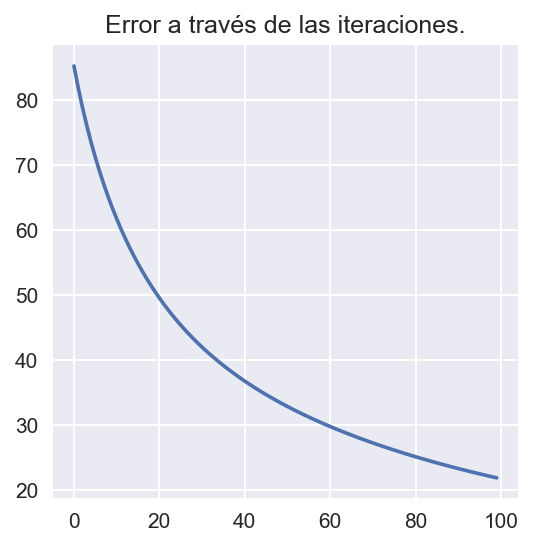

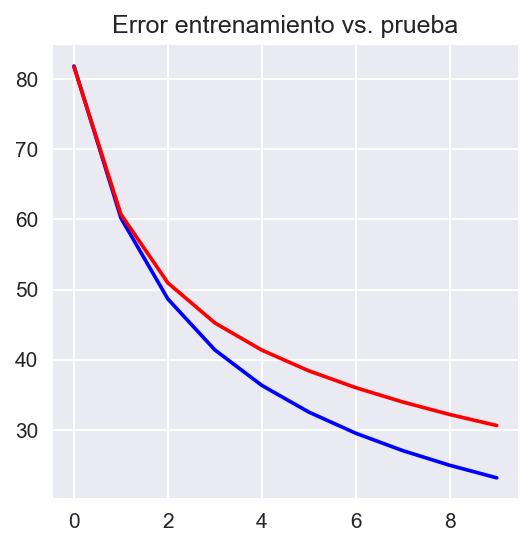

In [44]:
over_w = Regresion_Validar(over_train,over_ytrain,over_test,over_ytest,iteraciones=100,ritmo = 0.001,imprime = False)

### Para el modelo underfit, usaremos solo el area de la casa.

In [45]:
underfit = ventas_norm['area_lote'].values.reshape(-1,1)
division = np.random.rand(len(underfit)) < 0.7 #Escoge 70% de los datos

under_train =underfit[division]
under_test = underfit[~division]

under_ytrain = log_p[division]
under_ytest = log_p[~division]

Iteracion 0
Error del entrenamiento: 69.09618807409086
Error de prueba: 69.06513341355556
Iteracion 10
Error del entrenamiento: 8.520766425350212
Error de prueba: 8.513671232338355
Iteracion 20
Error del entrenamiento: 1.1562649912163934
Error de prueba: 1.1572628721536444
Iteracion 30
Error del entrenamiento: 0.26091431834341144
Error de prueba: 0.26471290263590463
Iteracion 40
Error del entrenamiento: 0.15205990177950152
Error de prueba: 0.156832452572242
Iteracion 50
Error del entrenamiento: 0.13882556445624167
Error de prueba: 0.14393691398214367
Iteracion 60
Error del entrenamiento: 0.13721654316882967
Error de prueba: 0.14244568897228893
Iteracion 70
Error del entrenamiento: 0.13702091786744292
Error de prueba: 0.1422910025180811
Iteracion 80
Error del entrenamiento: 0.13699713347217843
Error de prueba: 0.1422814417893128
Iteracion 90
Error del entrenamiento: 0.13699424170527805
Error de prueba: 0.1422834908221428
Iteracion 100
Error del entrenamiento: 0.13699389011345456
Error d

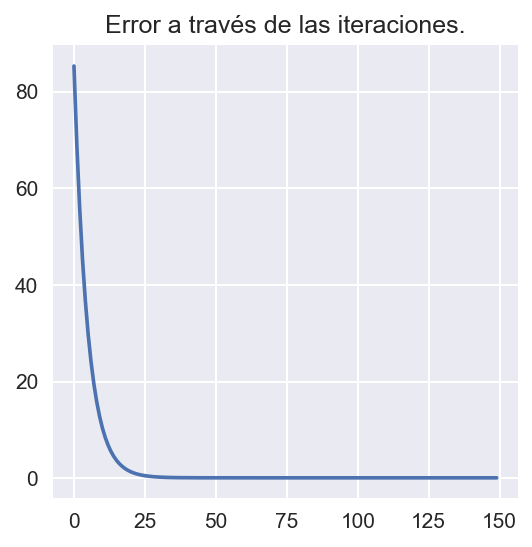

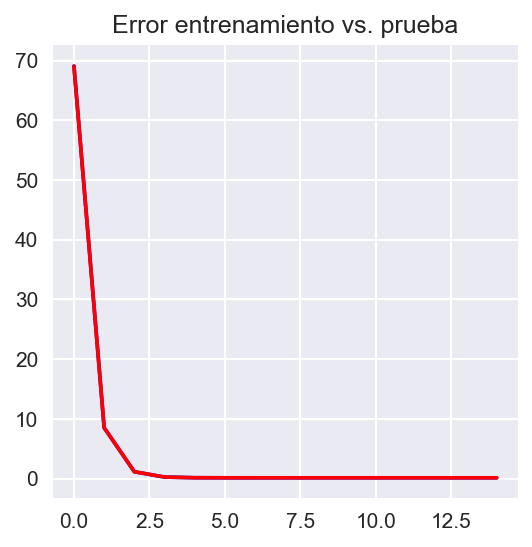

In [46]:
under_w = Regresion_Validar(under_train,under_ytrain,under_test,under_ytest,iteraciones=150,ritmo = 0.1,imprime = False)

### Y, para el modelo bueno, usamos todas las variables.

In [47]:
fit = ventas_norm
division = np.random.rand(len(fit)) < 0.7 #Escoge 70% de los datos

Xtrain =fit[division]
Xtest = fit[~division]

ytrain = log_p[division]
ytest = log_p[~division]

Iteracion 0
Error del entrenamiento: 69.05600880861037
Error de prueba: 69.1623399283922
Iteracion 10
Error del entrenamiento: 8.508669816749983
Error de prueba: 8.562553765955714
Iteracion 20
Error del entrenamiento: 1.1479224264774746
Error de prueba: 1.1649341254518655
Iteracion 30
Error del entrenamiento: 0.2516275376955531
Error de prueba: 0.2575823482788687
Iteracion 40
Error del entrenamiento: 0.14219493316541817
Error de prueba: 0.14496930411364695
Iteracion 50
Error del entrenamiento: 0.1287188286169599
Error de prueba: 0.13054509935872022
Iteracion 60
Error del entrenamiento: 0.12700102761480025
Error de prueba: 0.12854221969569346
Iteracion 70
Error del entrenamiento: 0.12674952985019458
Error de prueba: 0.12821217204657429
Iteracion 80
Error del entrenamiento: 0.12669416398814673
Error de prueba: 0.12814370613115006
Iteracion 90
Error del entrenamiento: 0.12667239328030083
Error de prueba: 0.1281288393026785
Iteracion 100
Error del entrenamiento: 0.12666038633810714
Error d

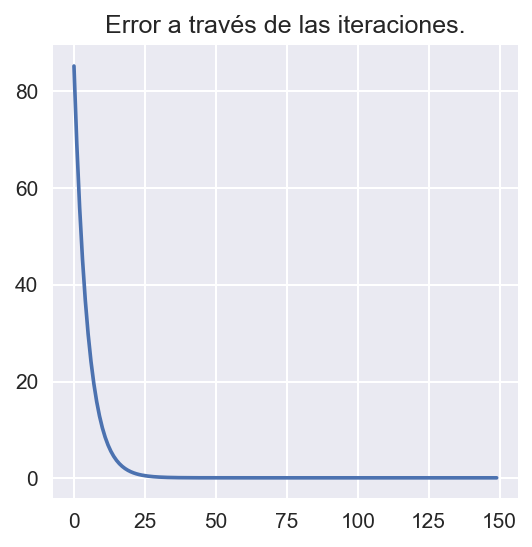

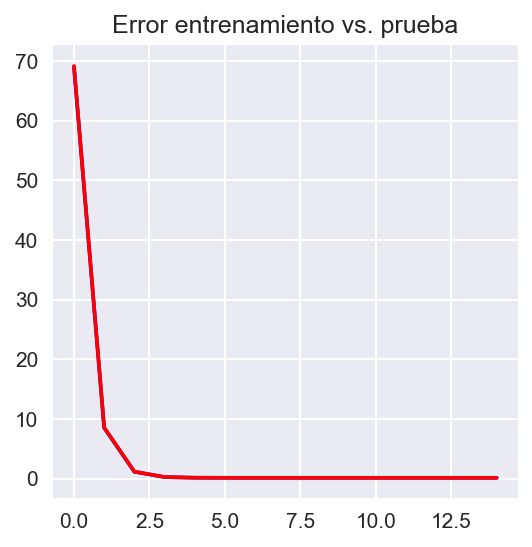

In [48]:
fit_w = Regresion_Validar(Xtrain,ytrain,Xtest,ytest,iteraciones=150,ritmo = 0.1,imprime = False)

### Finalmente, visualisemos la compración entre las predicciones y la realidad

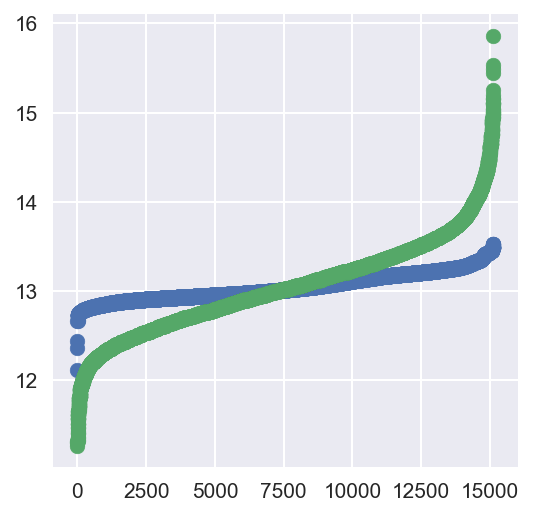

In [49]:
linea = predecir(Xtrain,fit_w)
linea.sort()
plt.scatter(range(len(linea)),linea)
plt.scatter(range(len(ytrain)),ytrain)

# PREGUNTAS?